# Final Project Part 3 - Cheri Hung


In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import pylab as pl
import numpy as np
import seaborn as sns
from pandas.io import sql
import sqlite3

plt.style.use('ggplot')

wd = 'assets/'
db_conn = sqlite3.connect(wd+'dev_hung.db')
print db_conn

## I. Exploratory Analysis

### Dataset 1: Ideal Cost vs Actual Cost, Winter 2016

#### Date range: 2016-12-01 to 2017-02-28
To account for seasonal trends as a likely covariate affecting the outcome, the initial analysis will be based on the 2016 Winter season. This seasonal dataset also comprises of a majority of the data I have access to.

In [69]:
#create dataframe of the main dataset of a SQL View 
df_IvAC_winter_raw = sql.read_sql('SELECT * FROM vw_IVActualC_Dates_Categories', con=db_conn)
df_IvAC_winter = df_IvAC_winter_raw.dropna()
df_IvAC_winter.head(2)

,InventoryID,ProductID,Date,ProductDescription,VarianceQty,BeginQty,EndQty,ActualQty,IdealQty,CategoryID,Category,ProductType,StoreID
0,453,26,12/8/16 0:00,Tito's Vodka,-67.628,135.256,202.884,-67.628,0.0,11,Liquor,1,15
2,466,26,12/9/16 0:00,Tito's Vodka,67.628,202.884,135.256,67.628,0.0,11,Liquor,1,15


| Variable | Description | Type of Variable |
|----------|:-------------:|------:|
| InventoryID |Identifying inventory ID | discrete numerical ID |
| ProductID |Identifying ingredient ID | discrete numerical ID |
| Date | Inventory order date | discrete numerical ID |
| ProductDescription | Ingredient name | text |
| VarianceQty | Difference between ActualQty and IdealQty | continous numerical |
| BeginQty | Ingredient qty at the beginning of inventory period | continous numerical |
| EndQty | Ingredient qty at the end of inventory period | continous numerical |
| ActualQty | Difference between BeginQty and EndQty | continous numerical |
| IdealQty | What's the expected difference between BeginQty and EndQty | continous numerical |
| CategoryID | category id | discrete numerical ID |
| Category | category the ingredient belongs to | text |
| ProductType | a general product type. 1=liquor, 2=food, 3=other, 4=merchandise | discrete numerical ID |
| StoreID | store that data is associated with | discrete numerical ID |


In [79]:
df_categories = sql.read_sql('SELECT CategoryID, Category FROM Categories', con=db_conn)
df_categories

,CategoryID,Category
0,0,NOT ASSIGNED
1,1,Meat
2,2,Produce
3,3,Dairy
4,4,Other Food
5,5,Seafood
6,6,Poultry
7,7,Bread
8,8,NA Beverage
9,9,Beer


In [122]:
ivac_foods = df_IvAC_winter[df_IvAC_winter['ProductType'] == '2']
ivac_foods.head(3)

,InventoryID,ProductID,Date,ProductDescription,VarianceQty,BeginQty,EndQty,ActualQty,IdealQty,CategoryID,Category,ProductType,StoreID
7,943,68,2/24/17 0:00,"Spice, Flour Seasoning",0.240,22,19.000,3,2.76,4,Other Food,2,15
8,406,80,12/2/16 0:00,Sour Cream,34.400,381.6,115.200,266.4,232.00,3,Dairy,2,7
9,388,85,12/1/16 0:00,Shrimp 21/25,-583.376,2783.92,3367.296,-583.376,0.00,5,Seafood,2,16


In [202]:
#take a look at the data by category in the Food (product type 2) group
ivac_foods_grouped = ivac_foods.groupby('CategoryID')
ivac_foods_grouped.size()

CategoryID
1    293
2     12
3    145
4    251
5    231
6    406
7      1
dtype: int64

In [181]:
#poultry category has the most data, let's use that
ivac_poultry = df_IvAC_winter[df_IvAC_winter['CategoryID'] == 6] 

#variance quantity of poultry only in the main dataset
varQty_poultry = ivac_poultry.VarianceQty

#overage
varQty_poultry_pos = ivac_poultry[ivac_poultry.VarianceQty > 0].VarianceQty

### Variance Quantity - Main dataset

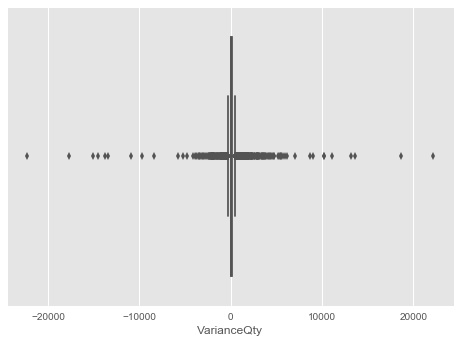

In [182]:
#variance quantity of the main dataset
varQty = df_IvAC_winter.VarianceQty
sns.boxplot(varQty)

Very sparse boxplot with a lot of significant outliers. So let's see if the data is more streamlined by looking at just the Poultry category.

### Variance Quantity - Poultry Only

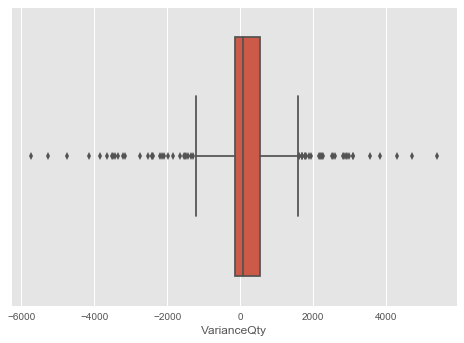

In [183]:
sns.boxplot(varQty_poultry)

### Actual Overage i.e. positive variance quantity

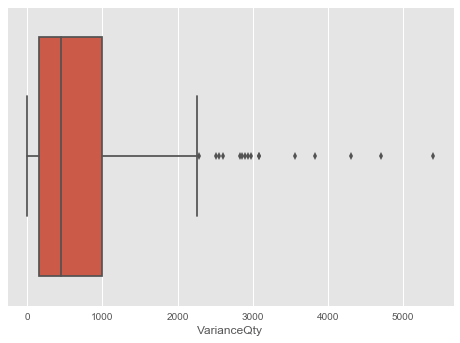

In [184]:
sns.boxplot(varQty_poultry_pos)

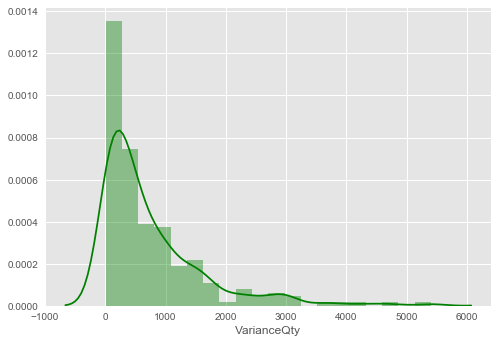

In [186]:
sns.distplot(varQty_poultry_pos, color='green', norm_hist=True)

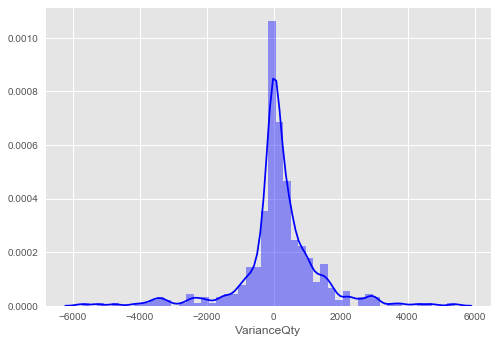

In [187]:
sns.distplot(varQty_poultry, color='blue', norm_hist=True)

In [220]:
ivac_foods_group = ivac_foods.groupby('ProductID')
#chicken_breasts = ivac_foods[ivac_foods['ProductID'] == 459]

In [223]:
ivac_foods_group.size()

ProductID
68       1
80       1
85     170
265     85
285      6
286     11
289      6
292      3
295     27
310      2
331     56
339     24
354      9
399     95
404      6
406     19
407     10
416      1
433     26
456     42
457      4
458    133
459    227
463      9
467     29
481     59
484      1
498      1
520     36
521     36
522     33
523      8
524     69
525      6
526     88
dtype: int64

## Part 2. Rollup MenuItems Dataset